# Jammu & Kashmir Tourism Data Analysis and Revenue Prediction
This project analyzes tourism data from Jammu & Kashmir and uses machine learning to predict future revenue based on visitor statistics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\rizwan\Downloads\jk_tourism_filtered_with_total.csv")
df.head()

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists
0,2014,January,Srinagar,13266,4393,119046000,3.2,17659
1,2014,January,Gulmarg,21377,2235,133705000,3.6,23612
2,2014,January,Pahalgam,8755,1634,63383000,3.5,10389
3,2014,January,Leh,20053,2704,132713000,3.2,22757
4,2014,January,Sonamarg,14880,2276,101712000,2.3,17156


In [4]:
# Explore the dataset
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1980 non-null   int64  
 1   Month              1980 non-null   object 
 2   Destination        1980 non-null   object 
 3   Domestic_Visitors  1980 non-null   int64  
 4   Foreign_Visitors   1980 non-null   int64  
 5   Revenue_INR        1980 non-null   int64  
 6   Avg_Stay_Days      1980 non-null   float64
 7   Total_Tourists     1980 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 123.9+ KB


Year                 0
Month                0
Destination          0
Domestic_Visitors    0
Foreign_Visitors     0
Revenue_INR          0
Avg_Stay_Days        0
Total_Tourists       0
dtype: int64

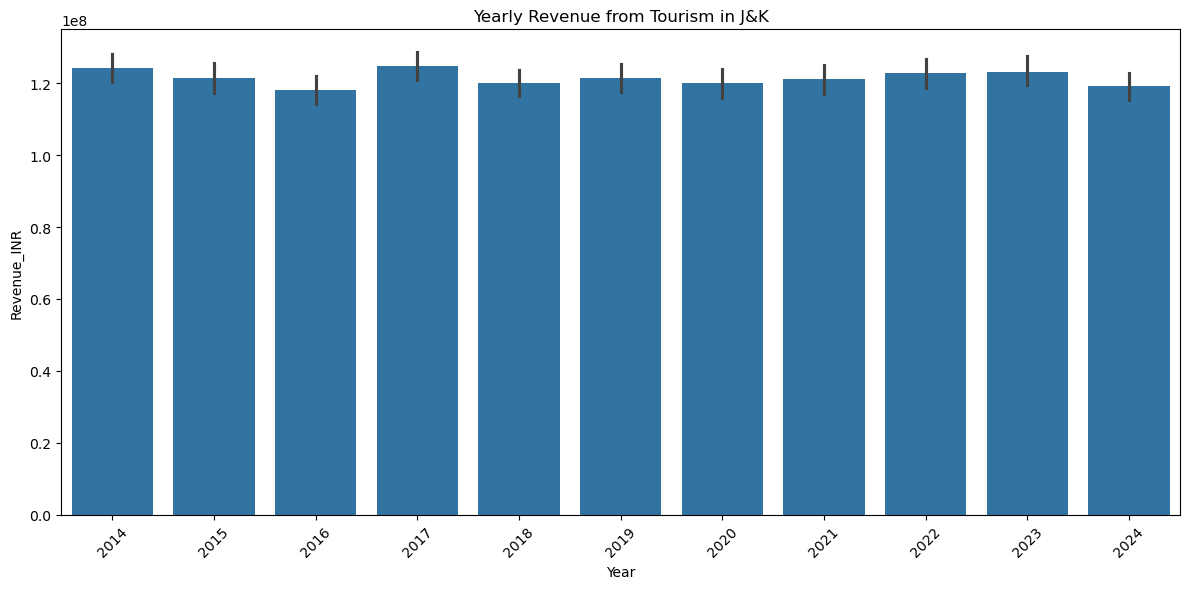

In [5]:
# Visualize revenue trends over the years
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Revenue_INR', data=df)
plt.title('Yearly Revenue from Tourism in J&K')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

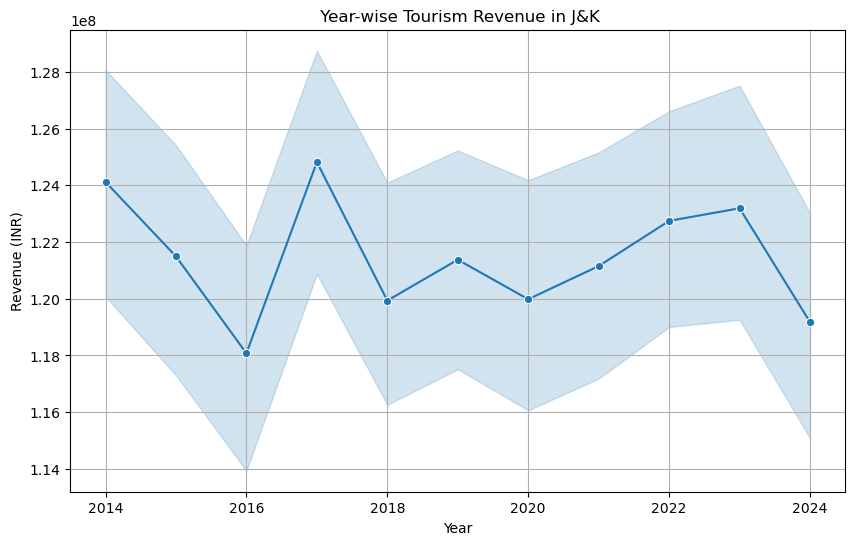

In [6]:
#Year-wise Tourism Revenue in J&K
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Revenue_INR', marker='o')
plt.title(" Year-wise Tourism Revenue in J&K")
plt.ylabel("Revenue (INR)")
plt.grid(True)
plt.show()


C:\Users\rizwan\AppData\Local\Temp\ipykernel_13576\1709519617.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Destination', y='Total_Tourists', estimator=sum, ci=None)


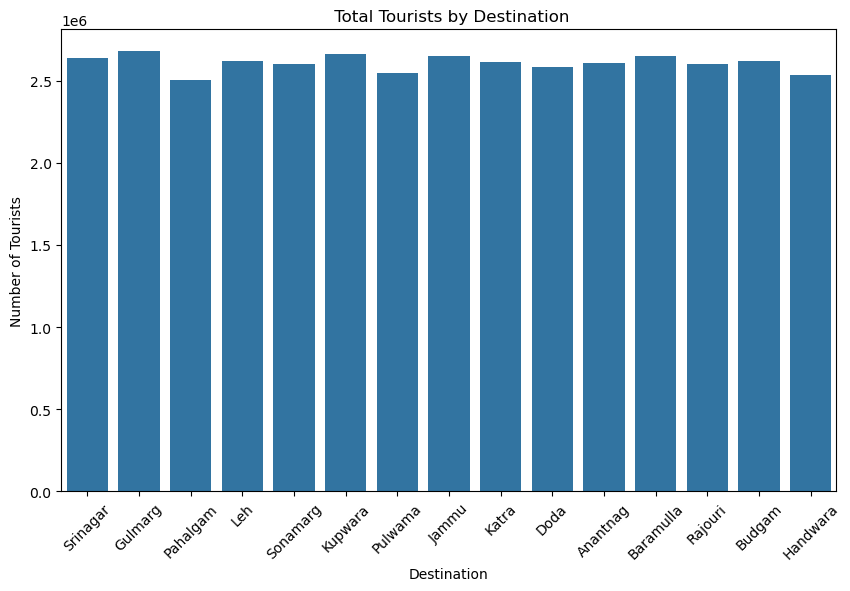

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Destination', y='Total_Tourists', estimator=sum, ci=None)
plt.title(" Total Tourists by Destination")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.show()

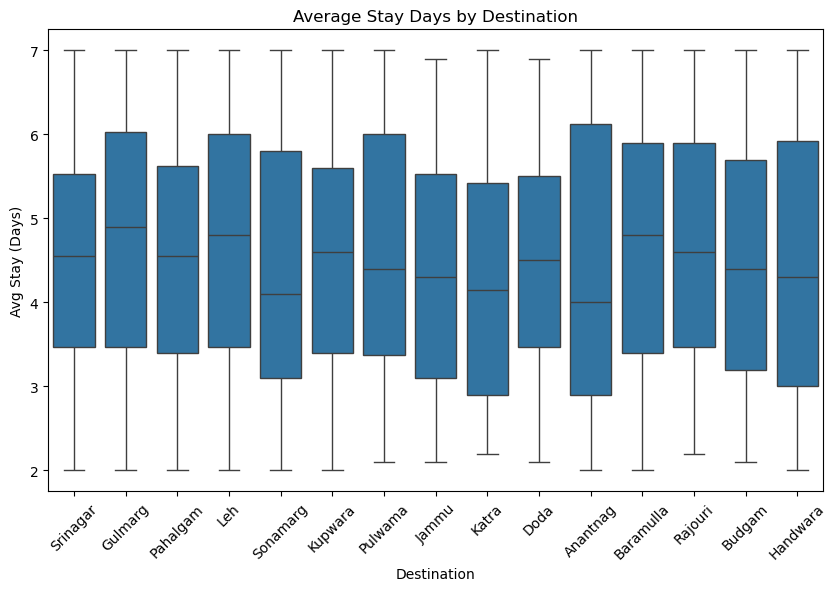

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Destination', y='Avg_Stay_Days')
plt.title("Average Stay Days by Destination")
plt.ylabel("Avg Stay (Days)")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Z-score based outlier detection
def detect_outliers_zscore(df, column_name, threshold=3):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z_scores = (df[column_name] - mean) / std
    outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
    return outliers

In [10]:
data=df[["Total_Tourists","Revenue_INR"]]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [11]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=10)
nn.fit(data)
d,i=nn.kneighbors(data)#d is distance and i is index numbers
print(d)
print(i)# for know the eps values

[[0.         0.0036004  0.00418723 ... 0.01588367 0.01696792 0.01774221]
 [0.         0.0074809  0.01119809 ... 0.01414698 0.01515131 0.01682473]
 [0.         0.00427191 0.00646402 ... 0.00965193 0.01370805 0.01468657]
 ...
 [0.         0.01005506 0.01167969 ... 0.01934101 0.02055153 0.02077046]
 [0.         0.00682801 0.00744105 ... 0.01419581 0.01453499 0.01515029]
 [0.         0.00260867 0.01267135 ... 0.01989587 0.01991687 0.02142876]]
[[   0 1163  280 ... 1893 1332 1455]
 [   1  980 1657 ... 1306  824 1051]
 [   2 1189  946 ... 1378 1371  774]
 ...
 [1977  961 1266 ...   52  717 1507]
 [1978 1592  431 ... 1633 1364  399]
 [1979  704 1483 ... 1260 1129  882]]


In [12]:
type(df)

pandas.core.frame.DataFrame

**"We chose this because we know the expected value of ESP for DBSCAN."**


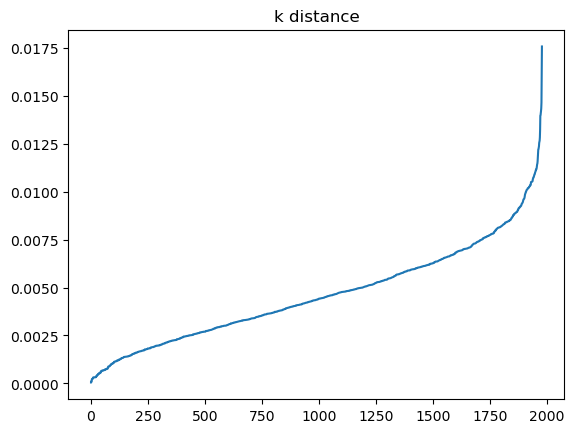

In [14]:

import numpy as np
d=d[:,1]
d=np.sort(d,axis=0)
plt.plot(d)
plt.title("k distance")
plt.show()

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan=DBSCAN(eps=0.012,min_samples=10)#eps=radius and min_simple = boarders how many points are in it is up to us how much
dbscan.fit(data)
labels=dbscan.labels_
print(labels)
print(np.unique(labels))
print(np.unique(labels,return_counts=True))

[-1 -1 -1 ... -1 -1 -1]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51], dtype=int64), array([1297,   16,   18,   18,   18,   10,   25,   19,   37,   27,   19,
         16,   12,   10,    7,   10,   13,   15,   16,   12,   10,   14,
         13,   10,    9,   10,   14,   18,   14,   12,   18,   10,   11,
         10,   10,   13,   11,   10,   13,   12,   13,    8,   11,   10,
         10,    5,    7,    9,   10,   10,   10,   10,   10], dtype=int64))


In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()#creating object
df["Month"]=encoder2.fit_transform(df["Month"])
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists
0,2014,4,Srinagar,13266,4393,119046000,3.2,17659
1,2014,4,Gulmarg,21377,2235,133705000,3.6,23612
2,2014,4,Pahalgam,8755,1634,63383000,3.5,10389
3,2014,4,Leh,20053,2704,132713000,3.2,22757
4,2014,4,Sonamarg,14880,2276,101712000,2.3,17156
...,...,...,...,...,...,...,...,...
1975,2024,2,Anantnag,21566,4338,159886000,5.5,25904
1976,2024,2,Baramulla,18643,4419,146243000,6.0,23062
1977,2024,2,Rajouri,9913,3643,93281000,3.4,13556
1978,2024,2,Budgam,9103,1721,66167000,4.0,10824


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()#creating object
df["Destination"]=encoder2.fit_transform(df["Destination"])
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists
0,2014,4,14,13266,4393,119046000,3.2,17659
1,2014,4,4,21377,2235,133705000,3.6,23612
2,2014,4,10,8755,1634,63383000,3.5,10389
3,2014,4,9,20053,2704,132713000,3.2,22757
4,2014,4,13,14880,2276,101712000,2.3,17156
...,...,...,...,...,...,...,...,...
1975,2024,2,0,21566,4338,159886000,5.5,25904
1976,2024,2,1,18643,4419,146243000,6.0,23062
1977,2024,2,12,9913,3643,93281000,3.4,13556
1978,2024,2,2,9103,1721,66167000,4.0,10824


In [21]:
type(df)

pandas.core.frame.DataFrame

**Separate features and target**

In [23]:
# Separate features and target
X = df.drop(['Revenue_INR'], axis=1)
y = df['Revenue_INR']

**Split into training and testing sets**

In [25]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(y_test)

215      88067000
161     105043000
135     108659000
386     155909000
674      85445000
          ...    
792     129312000
318     144293000
1902    162383000
621      95628000
1749    132801000
Name: Revenue_INR, Length: 396, dtype: int64


**Train the Linear Regression model**

In [27]:
# Train the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() #creating object for model
regressor.fit(x_train,y_train)#fit method is used to feed the module with traning data
#next to preduct 
y_pred=regressor.predict(x_test)
print(y_pred)

[8.80670e+07 1.05043e+08 1.08659e+08 1.55909e+08 8.54450e+07 8.46270e+07
 1.23173e+08 1.00572e+08 1.38557e+08 1.41790e+08 1.21085e+08 8.52500e+07
 1.06113e+08 1.59838e+08 1.18498e+08 1.18429e+08 1.61938e+08 1.21891e+08
 1.15180e+08 1.16059e+08 1.12672e+08 1.59025e+08 1.02171e+08 1.40975e+08
 9.99570e+07 1.77137e+08 6.78100e+07 9.91370e+07 1.29899e+08 1.29720e+08
 1.18761e+08 1.00430e+08 9.73500e+07 1.51303e+08 8.78810e+07 1.63692e+08
 9.26750e+07 9.44720e+07 1.47962e+08 1.65428e+08 1.45160e+08 1.53522e+08
 1.42847e+08 1.15519e+08 8.12340e+07 1.34869e+08 1.10623e+08 1.05272e+08
 1.60692e+08 1.51367e+08 1.24223e+08 1.36555e+08 8.48450e+07 1.39335e+08
 1.29313e+08 1.49282e+08 1.37443e+08 1.16258e+08 9.08940e+07 1.28329e+08
 1.73652e+08 1.40841e+08 1.04704e+08 9.18780e+07 1.30966e+08 1.34711e+08
 1.27236e+08 7.52140e+07 1.76576e+08 1.02075e+08 1.04814e+08 1.48658e+08
 1.47924e+08 8.67280e+07 1.23037e+08 1.38372e+08 1.09477e+08 8.80490e+07
 1.41336e+08 1.40241e+08 1.13655e+08 1.29248e+08 9.

In [28]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

7.306164651952419e-16


In [29]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

1.892748505178124e-08


**R2 Score Of Linear Regression model**

In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

1.0


**Train the DecisionTreeRegressor**

In [79]:
from sklearn.tree import DecisionTreeRegressor
d=DecisionTreeRegressor(min_samples_split=5)
d.fit(x_train,y_train)
y_pred=d.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9969912603299892


**R2 Score Of DecisionTreeRegressor**

In [81]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

1206469.2760942762


In [83]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

2283123250385.803


In [85]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9969912603299892


**Train the RandomForestRegressor**

In [37]:
from sklearn.ensemble import RandomForestRegressor#it is randomforest regressor
r= RandomForestRegressor(n_estimators=100)#how much modules works
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print(y_pred)

[8.8012230e+07 1.0445539e+08 1.0806832e+08 1.5650824e+08 8.5264070e+07
 8.5260980e+07 1.2293365e+08 1.0056647e+08 1.3834567e+08 1.4074351e+08
 1.2087190e+08 8.6994520e+07 1.0688156e+08 1.6005836e+08 1.1823405e+08
 1.1818383e+08 1.6195203e+08 1.2270000e+08 1.1509458e+08 1.1619692e+08
 1.1245807e+08 1.5930027e+08 1.0234547e+08 1.4032561e+08 1.0084945e+08
 1.7683921e+08 6.8492630e+07 9.9556690e+07 1.3007432e+08 1.3039876e+08
 1.1585545e+08 1.0086153e+08 9.7363550e+07 1.5320131e+08 8.7724560e+07
 1.6399441e+08 9.2716830e+07 9.4020970e+07 1.4826399e+08 1.6548024e+08
 1.4668051e+08 1.5364441e+08 1.4238602e+08 1.1611827e+08 8.1551780e+07
 1.3643254e+08 1.1167107e+08 1.0564622e+08 1.6109486e+08 1.5063991e+08
 1.2482321e+08 1.3655002e+08 8.4865390e+07 1.3873889e+08 1.2941311e+08
 1.4862204e+08 1.3716533e+08 1.1674989e+08 9.1625500e+07 1.2792897e+08
 1.7370721e+08 1.4099123e+08 1.0503483e+08 9.1217760e+07 1.3111134e+08
 1.3535689e+08 1.2603273e+08 7.5541690e+07 1.7643580e+08 1.0232360e+08
 1.047

**R2 Score Of  RandomForestRegressor**

In [39]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9993806650566431


**Train the KNeighborsRegressor**

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

**R2 Score Of KNeighborsRegressor**

In [43]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9992596073228062


**"After comparing all the algorithms, we found that the Decision Tree is the best algorithm for our data."**

**"After comparing all the models, we found that there is no overfitting in any of our machine learning models except for Linear Regression."**

**Decision Tree**: 60,016,030.0

**Random Forest**: 59,215,500.0

**K-Nearest Neighbors (KNN)**: 6,004,433.33

**Linear Regression**: 781,680.22


**Predict revenue for a custom input**


In [46]:
# You must match the input format exactly with the training data
sample_input = X.columns
empty_input = pd.DataFrame([np.zeros(len(sample_input))], columns=sample_input)
# Example: Set values manually (edit as needed)
empty_input.loc[0, 'Domestic_Visitors'] = 100
empty_input.loc[0, 'Foreign_Visitors'] = 500
empty_input.loc[0, 'Avg_Stay_Days'] = 3.5
empty_input.loc[0, 'Total_Tourists'] = 1050
# Set correct month and destination flags
empty_input.loc[0, 'Month'] = 1
empty_input.loc[0, 'Destination'] = 2
# Predict
predicted_revenue = regressor.predict(empty_input)
print('Predicted Revenue (INR):', predicted_revenue[0])

Predicted Revenue (INR): 7816809.221282478
